# Environment 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matrixProfile

In [3]:
import IPython.display
import librosa
import librosa.display

In [4]:
from tqdm import tqdm

In [5]:
def ts_visualization(ts):
  plt.figure(figsize=(10, 6))
  plt.subplot(2, 1, 1)
  plt.title('Time Series', fontsize=18)
  plt.xlabel('Time', fontsize=18)
  plt.ylabel('Value', fontsize=18)
  plt.grid()
  plt.plot(ts, label='Time Series', color='blue')

In [6]:
def leadfollow_visualization(ts1,ts2):
  plt.figure(figsize=(15, 10))

  plt.subplot(2, 1, 1)
  plt.title('Leading Time Series (Adam Singing)', fontsize=22)
  plt.xlabel('Time', fontsize=22)
  plt.ylabel('Value', fontsize=22)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.grid()
  plt.plot(ts1, label='Leading signal', color='blue')

  plt.subplot(2, 1, 2)
  plt.title('Following Time Series (Matt Singing)', fontsize=22)
  plt.xlabel('Time', fontsize=22)
  plt.ylabel('Value', fontsize=22)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.grid()
  plt.plot(ts2, label='Following signal', color='red')

  plt.tight_layout()
  plt.show()

In [7]:
def alignment_plot(lead_ts,follow_ts,result):

    index_lead   = result[2][1]
    index_follow = result[2][0]

    y1 = lead_ts[index_lead]
    y2 = follow_ts[index_follow]

    x3 = index_follow
    y3 = index_lead

    gap = len(y1) - len(y2)
    stardard_length = len(y1)

    print(fr"stardard_length: {stardard_length}")

    if gap<0:  #leader shorter 
        stardard_length = len(y2)
        midrange = (max(y1)+min(y1))/2
        y1 = np.hstack([y1,np.ones(np.abs(gap))*(midrange)])
        y3 = np.hstack([y3,np.ones(np.abs(gap))*max(y3)])
    elif gap>0: #follower shorter 
        stardard_length = len(y1)
        midrange = (max(y2)+min(y2))/2
        y2 = np.hstack([y2,np.ones(np.abs(gap))*(midrange)])
        x3 = np.hstack([x3,np.ones(np.abs(gap))*max(x3)])

    x1 = np.linspace(0,1, stardard_length)
    x2 = np.linspace(0,1, stardard_length)

    fig = plt.figure(figsize=(10, 10))

    ax1 = fig.add_axes([0.05, 0.42, 0.3, 0.6])  
    ax2 = fig.add_axes([0.42, 0.05, 0.6, 0.3])  
    ax3 = fig.add_axes([0.42, 0.42, 0.6, 0.6])  

    ax1.plot(y1, x1)
    ax1.set_ylabel('Leader Time Series', fontsize=18)
    ax1.set_yticks([])  

    ax2.plot(x2, y2)
    ax2.set_xlabel('Following Time Series', fontsize=18)
    ax2.set_xticks([])  

    ax3.plot(y3, x3)

    plt.show()

In [8]:
def alignment_plot(lead_ts, follow_ts, result):
    index_lead = result[2][1]
    index_follow = result[2][0]

    y1 = lead_ts[index_lead]
    y2 = follow_ts[index_follow]

    x3 = index_follow
    y3 = index_lead

    gap = len(y1) - len(y2)

    if gap < 0:  # leader shorter
        midrange = (max(y1) + min(y1)) / 2
        y1 = np.hstack([y1, np.ones(np.abs(gap)) * midrange])
        y3 = np.hstack([y3, np.ones(np.abs(gap)) * max(y3)])
    elif gap > 0:  # follower shorter
        midrange = (max(y2) + min(y2)) / 2
        y2 = np.hstack([y2, np.ones(np.abs(gap)) * midrange])
        x3 = np.hstack([x3, np.ones(np.abs(gap)) * max(x3)])

    standard_length = max(len(y1), len(y2))
    print(f"Standard Length: {standard_length}")

    x1 = np.linspace(0, 1, standard_length)
    x2 = np.linspace(0, 1, standard_length)

    fig = plt.figure(figsize=(10, 10))

    ax1 = fig.add_axes([0.05, 0.42, 0.3, 0.6])  
    ax2 = fig.add_axes([0.42, 0.05, 0.6, 0.3])  
    ax3 = fig.add_axes([0.42, 0.42, 0.6, 0.6])  

    ax1.plot(y1, x1)
    ax1.set_ylabel('Leader Time Series', fontsize=18)
    ax1.set_yticks([])  

    ax2.plot(x2, y2)
    ax2.set_xlabel('Following Time Series', fontsize=18)
    ax2.set_xticks([])  

    ax3.plot(y3, x3)

    plt.show()

In [9]:
def gap_fill(timeseries,thres=0.1):

    threshold = int((len(timeseries))*thres)

    for i in range(len(timeseries)-1):
        
        previous_element = timeseries[i]
        next_element     = timeseries[i+1]

        gap = next_element-previous_element

        if (gap < threshold) and (1<gap):
            new_elements = np.array([i for i in range(previous_element+1,next_element)])
            timeseries = np.insert(timeseries, i+1, new_elements)
    
    return timeseries

In [25]:
def following_relation_method(lead_ts,follow_ts,wd=300,gap=10):

    following_motif_index = [None,None]

    leader_mp,_   = matrixProfile.stamp(follow_ts,wd,lead_ts)
    follower_mp,_ = matrixProfile.stamp(lead_ts,wd,follow_ts)

    rmp = [follower_mp,leader_mp]

    for i in range(2):

        motif_percentile = 50-gap 
        
        motif_index = rmp[i] <np.percentile(rmp[i], motif_percentile)
        motif_index_mp = np.where(motif_index)[0] 

        following_motif_index[i] = motif_index_mp.copy()
        following_motif_index[i] = list(set(following_motif_index[i]))

    following_motif_index[1] = following_motif_index[1][:len(following_motif_index[0])]

    
    #lead_result_value = np.mean(np.array(following_motif_index[0])-np.array(following_motif_index[1]))

    #following_motif_index[1] = following_motif_index[1][:len(following_motif_index[0])]

    lead_index   = list(following_motif_index[1])
    follow_index = list(following_motif_index[0])

    max_leader   = len(leader_mp)
    max_follower = len(follower_mp)
    normalized_x = lambda x,max : (x - 0) / (max - 0)

    lead_index_norm   = [normalized_x(x,max_leader) for x in lead_index] 
    follow_index_norm = [normalized_x(x,max_follower) for x in follow_index]

    lead_result_value = np.mean(np.array(follow_index_norm)-np.array(lead_index_norm))
    lead_result       = lead_result_value>0
    

    return lead_result,lead_result_value,following_motif_index


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to find continuous ranges in an array of indices
def find_continuous_ranges(indices):
    ranges = []
    start = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            ranges.append((start, indices[i - 1]))
            start = indices[i]
    ranges.append((start, indices[-1]))
    return ranges

"""
# Function to plot time series with highlighted ranges
def plot_time_series_with_highlights(ts, highlight_indices, ax,title="Time Series with Highlighted Ranges", ground_truth=None):
    # Find continuous ranges
    highlight_ranges = find_continuous_ranges(highlight_indices)

    # Plot the time series data
    ax.plot(ts)

    # Highlight the ranges
    for start_idx, end_idx in highlight_ranges:
        ax.axvspan(ts.index[start_idx], ts.index[end_idx], color='yellow', alpha=0.5)

    if ground_truth is not None: 
        for start_idx, end_idx in highlight_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx], color='red', alpha=0.5)    

    # Adding labels and title for clarity
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.set_title(fr"{title}")

"""

def plot_time_series_with_highlights(ts, highlight_indices, ax,
         title="Time Series with Highlighted Ranges", ground_truth_indices=None):
    # Plot the time series data
    ax.plot(ts,label='Time Series Data')

    # Highlight the predicted ranges
    if highlight_indices is not None:
        predicted_ranges = find_continuous_ranges(highlight_indices)
        for start_idx, end_idx in predicted_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                        color='green', alpha=1.0, label='Predicted')

    # Highlight the ground truth ranges
    if ground_truth_indices is not None:
        ground_truth_ranges = find_continuous_ranges(ground_truth_indices)
        for start_idx, end_idx in ground_truth_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                        color='red', alpha=1.0, label='Ground Truth')
            
    if highlight_indices is not None and ground_truth_indices is not None:
        overlap_indices = set(highlight_indices).intersection(ground_truth_indices)
        if overlap_indices:
            overlap_ranges = find_continuous_ranges(sorted(list(overlap_indices)))
            for start_idx, end_idx in overlap_ranges:
                ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                            color='yellow', alpha=1.0, label='Overlap')

    # Adding labels and title for clarity
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.set_title(title)

    # Create a legend with unique entries
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))



def create_timeseries_from_array(data_array, start_date='20230601', periods=None, freq="min"):
    if periods is None:
        periods = len(data_array)
    dates = pd.date_range(start=start_date, periods=periods, freq="min")
    ts = pd.Series(data_array, index=list(range(len(data_array))))
    return ts



In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to find continuous ranges in an array of indices
def find_continuous_ranges(indices):
    ranges = []
    start = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            ranges.append((start, indices[i - 1]))
            start = indices[i]
    ranges.append((start, indices[-1]))
    return ranges


def plot_time_series_with_highlights(ts, highlight_indices, ax,
                                     title="Time Series with Highlighted Ranges", 
                                     ground_truth_indices=None):
    # Plot the time series data
    ax.plot(ts.index, ts.values, label='Time Series Data')

    # Highlight the predicted ranges
    if highlight_indices is not None:
        predicted_ranges = find_continuous_ranges(highlight_indices)
        for start_idx, end_idx in predicted_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                       color='green', alpha=1, label='Predicted')

    # Highlight the ground truth ranges
    if ground_truth_indices is not None:
        ground_truth_ranges = find_continuous_ranges(ground_truth_indices)
        for start_idx, end_idx in ground_truth_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                       color='red', alpha=1, label='Ground Truth')
            
    # Highlight overlap areas
    if highlight_indices is not None and ground_truth_indices is not None:
        overlap_indices = set(highlight_indices).intersection(ground_truth_indices)
        if overlap_indices:
            overlap_ranges = find_continuous_ranges(sorted(list(overlap_indices)))
            for start_idx, end_idx in overlap_ranges:
                ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                           color='yellow', alpha=1, label='Overlap')

    # Adding labels and title for clarity
    ax.set_xlabel('Time Step', fontsize=18)
    ax.set_ylabel('Value', fontsize=18)
    ax.set_title(title, fontsize=20)

    # Create a legend with unique entries
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize=14)



def create_timeseries_from_array(data_array, start_date='20230601', periods=None, freq="min"):
    if periods is None:
        periods = len(data_array)
    dates = pd.date_range(start=start_date, periods=periods, freq="min")
    ts = pd.Series(data_array, index=list(range(len(data_array))))
    return ts



In [28]:
def ground_truth(ts):
    gt_ts = ts[1]
    ground_truth = []
    for i in range(len(gt_ts[1])):
        ground_truth = ground_truth + list(range(gt_ts[0][i],gt_ts[1][i]+1))

    return np.array(ground_truth)


def Non(a_list):
    return np.setdiff1d(np.array(range(len(a_list)+1)), a_list)


def confusion_matrix(TP, TN, FP, FN):

    def f1_score(TP, TN, FP, FN):
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * (precision * recall) / (precision + recall)
        return precision,recall,f1
    
    precision,recall,f1 = f1_score(TP, TN, FP, FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return TP,TN,FP,FN,precision,recall,f1,accuracy


def evaluate_a_pair_ts(leader,follower,seed=0,wd=30,gap=10):
    ground_truth_lead    = ground_truth(leader) 
    ground_truth_follow  = ground_truth(follower)

    ground_truth_lead = ground_truth_lead[:len(ground_truth_follow)]

    lead_ts   = (leader[0]).copy()
    follow_ts = (follower[0]).copy()

    np.random.seed(seed)
    result = following_relation_method(lead_ts,follow_ts,wd=wd,gap=gap)
    print(fr"{result[1]}")

    new_index_lead   = list(set(result[2][1]))
    new_index_follow = list(set(result[2][0]))

    new_index_lead = new_index_lead[:len(new_index_follow)]

    #==============================================

    # TP => #Point Method following match  #Point GT following
    existence_lead_TP = np.isin(new_index_lead, ground_truth_lead)
    existence_follow_TP = np.isin(new_index_follow, ground_truth_follow)
    TP = np.sum(existence_lead_TP)+np.sum(existence_follow_TP)
    
    # TN => #Point Method Non-following match  #Point GT Non-following
    existence_lead_TN = np.isin(Non(new_index_lead), Non(ground_truth_lead))
    existence_follow_TN = np.isin(Non(new_index_follow), Non(ground_truth_follow))
    TN = np.sum(existence_lead_TN)+np.sum(existence_follow_TN)
   
    # FP => #Point Method following match  #Point GT NON-following
    existence_lead_FP = np.isin(new_index_lead, Non(ground_truth_lead))
    existence_follow_FP = np.isin(new_index_follow, Non(ground_truth_follow))
    FP = np.sum(existence_lead_FP)+np.sum(existence_follow_FP)

    # FN => #Point Method NON-following NOT match #Point GT following
    existence_lead_FN = np.isin(Non(new_index_lead), ground_truth_lead)
    existence_follow_FN = np.isin(Non(new_index_follow), ground_truth_follow)
    FN = np.sum(existence_lead_FN)+np.sum(existence_follow_FN)

    #==============================================

    data = [TP, TN, FP, FN]

    #==============================================

    return np.array(data)


# Real Data1: Lost Star

In [29]:
path = fr"C:/Users/Hugh/Documents/workspace/2024/SAI_research/SAI_Paper_VScode/dataset"
y_adam_22050 = np.load(fr'{path}/y_adam_22050.npy')
y_matt_22050 = np.load(fr'{path}/y_matt_22050.npy')

y_adam_11025 = np.load(fr'{path}/y_adam_11025.npy')
y_matt_11025 = np.load(fr'{path}/y_matt_11025.npy')

In [30]:
def leadfollow_visualization(ts1,ts2):
  plt.figure(figsize=(15, 10))

  plt.subplot(2, 1, 1)
  plt.title('Leading Time Series (Adam Singing)', fontsize=30)
  plt.xlabel('Time', fontsize=30)
  plt.ylabel('Value', fontsize=30)
  plt.xticks(fontsize=25)
  plt.yticks(fontsize=25)
  plt.grid()
  plt.plot(ts1, label='Leading signal', color='blue')

  plt.subplot(2, 1, 2)
  plt.title('Following Time Series (Matt Singing)', fontsize=30)
  plt.xlabel('Time', fontsize=30)
  plt.ylabel('Value', fontsize=30)
  plt.xticks(fontsize=25)
  plt.yticks(fontsize=25)
  plt.grid()
  plt.plot(ts2, label='Following signal', color='red')

  plt.tight_layout()
  plt.show()

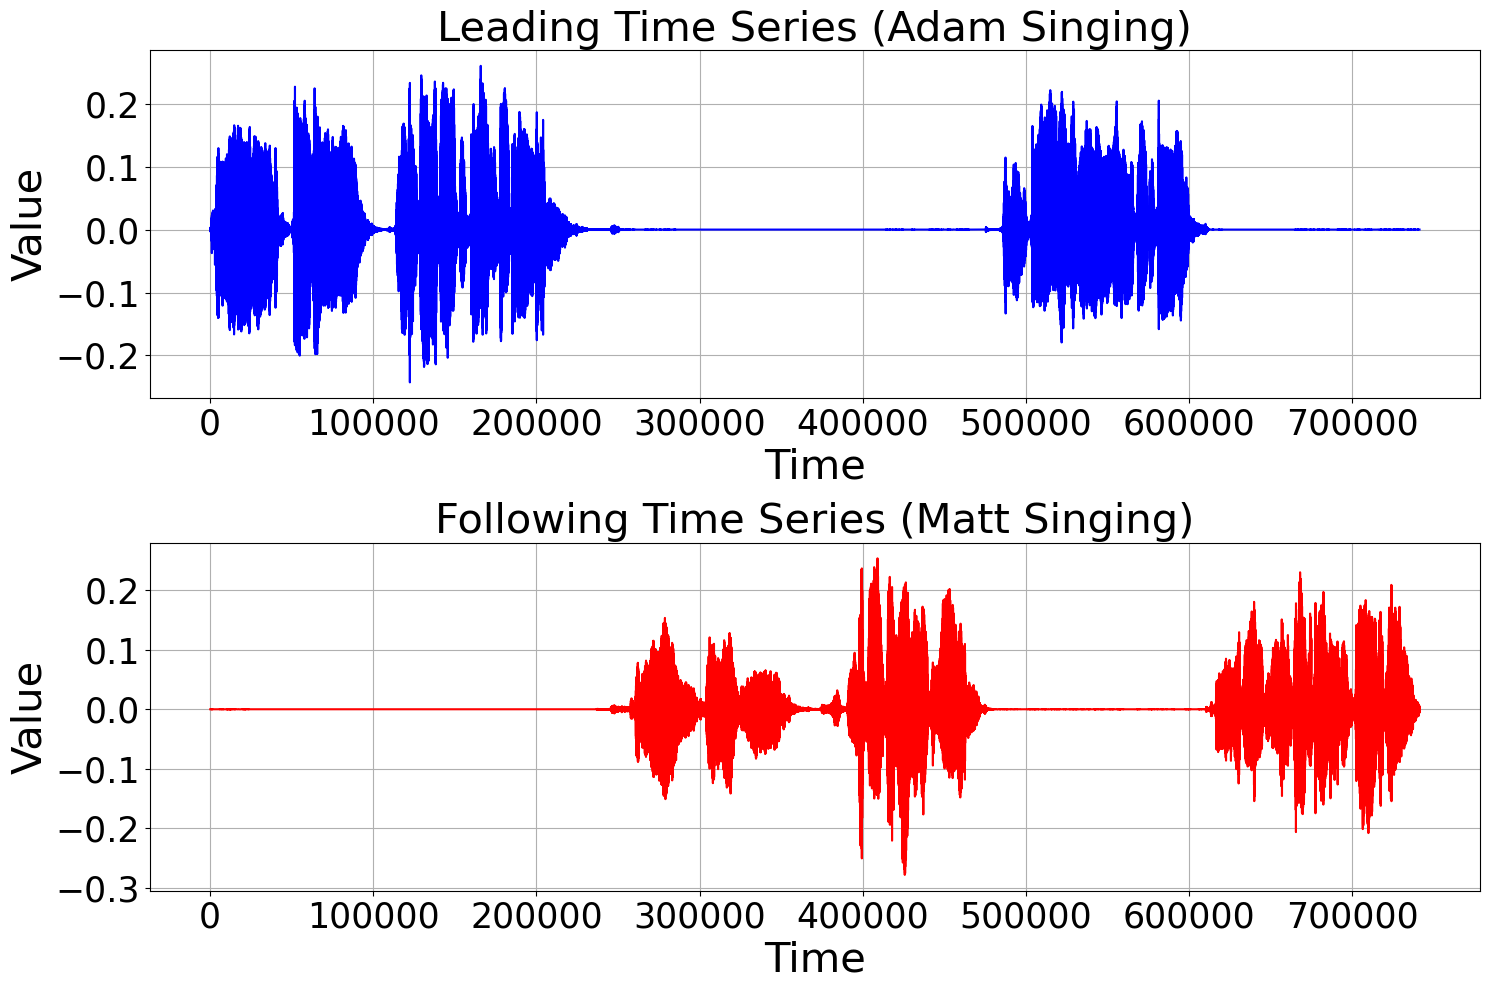

In [31]:
leadfollow_visualization(y_adam_22050,y_matt_22050)

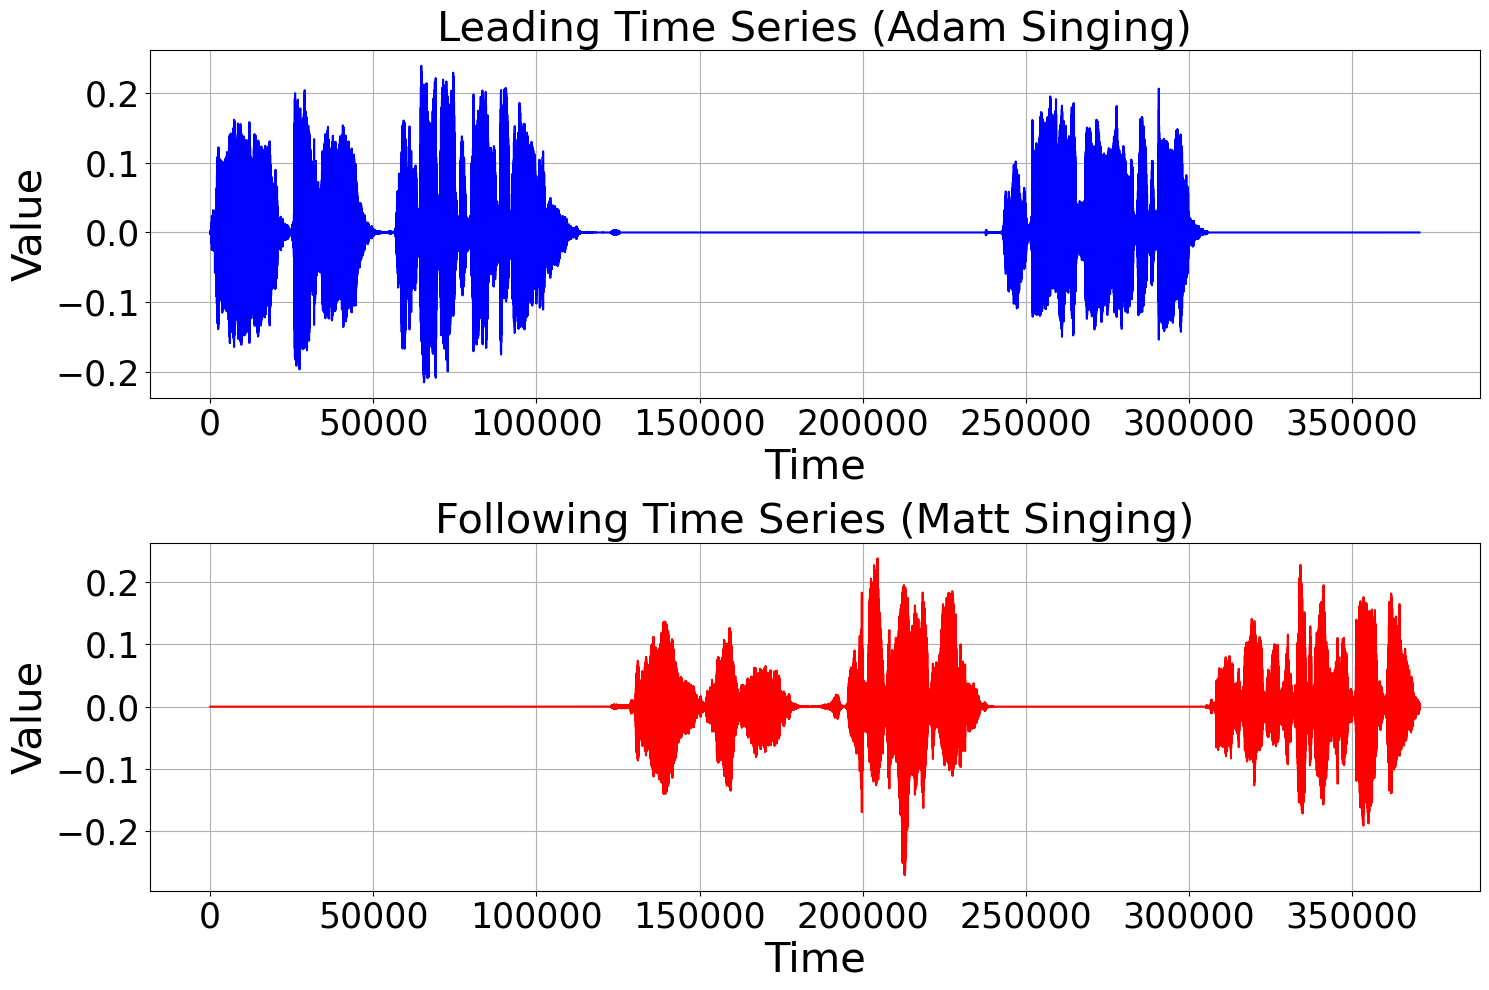

In [32]:
leadfollow_visualization(y_adam_11025,y_matt_11025)

## Adam and Matt sampling down and no noise test 

In [33]:
#4.sampling down the two time series
sample_y_adam   = y_adam_11025.copy()
sample_y_matt   = y_matt_11025.copy()

factor = len(sample_y_adam) // int(0.05*len(sample_y_adam))

sample_y_adam = sample_y_adam[:len(sample_y_adam) // factor * factor].reshape(-1, factor).mean(axis=1)
sample_y_matt = sample_y_matt[:len(sample_y_matt) // factor * factor].reshape(-1, factor).mean(axis=1)

#6.adding noise to avoid value 0 accuracy

noised_sample_y_adam   = sample_y_adam.copy()
noised_sample_y_matt   = sample_y_matt.copy()

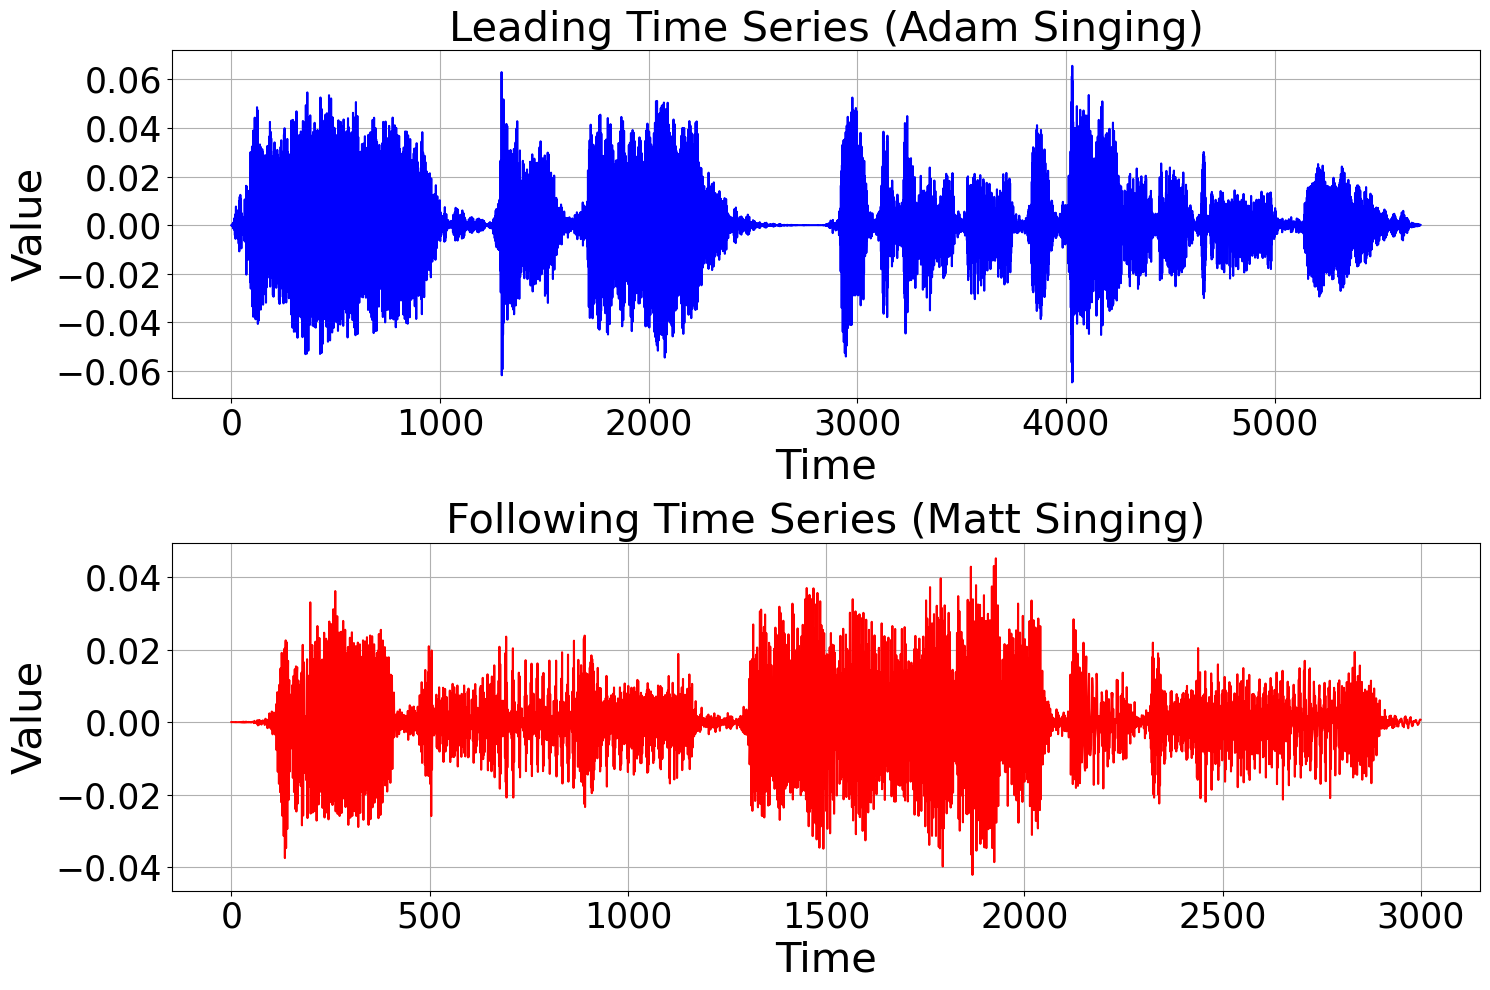

In [34]:
leadfollow_visualization(noised_sample_y_adam[0:5700],
                         noised_sample_y_adam[12100:15100])

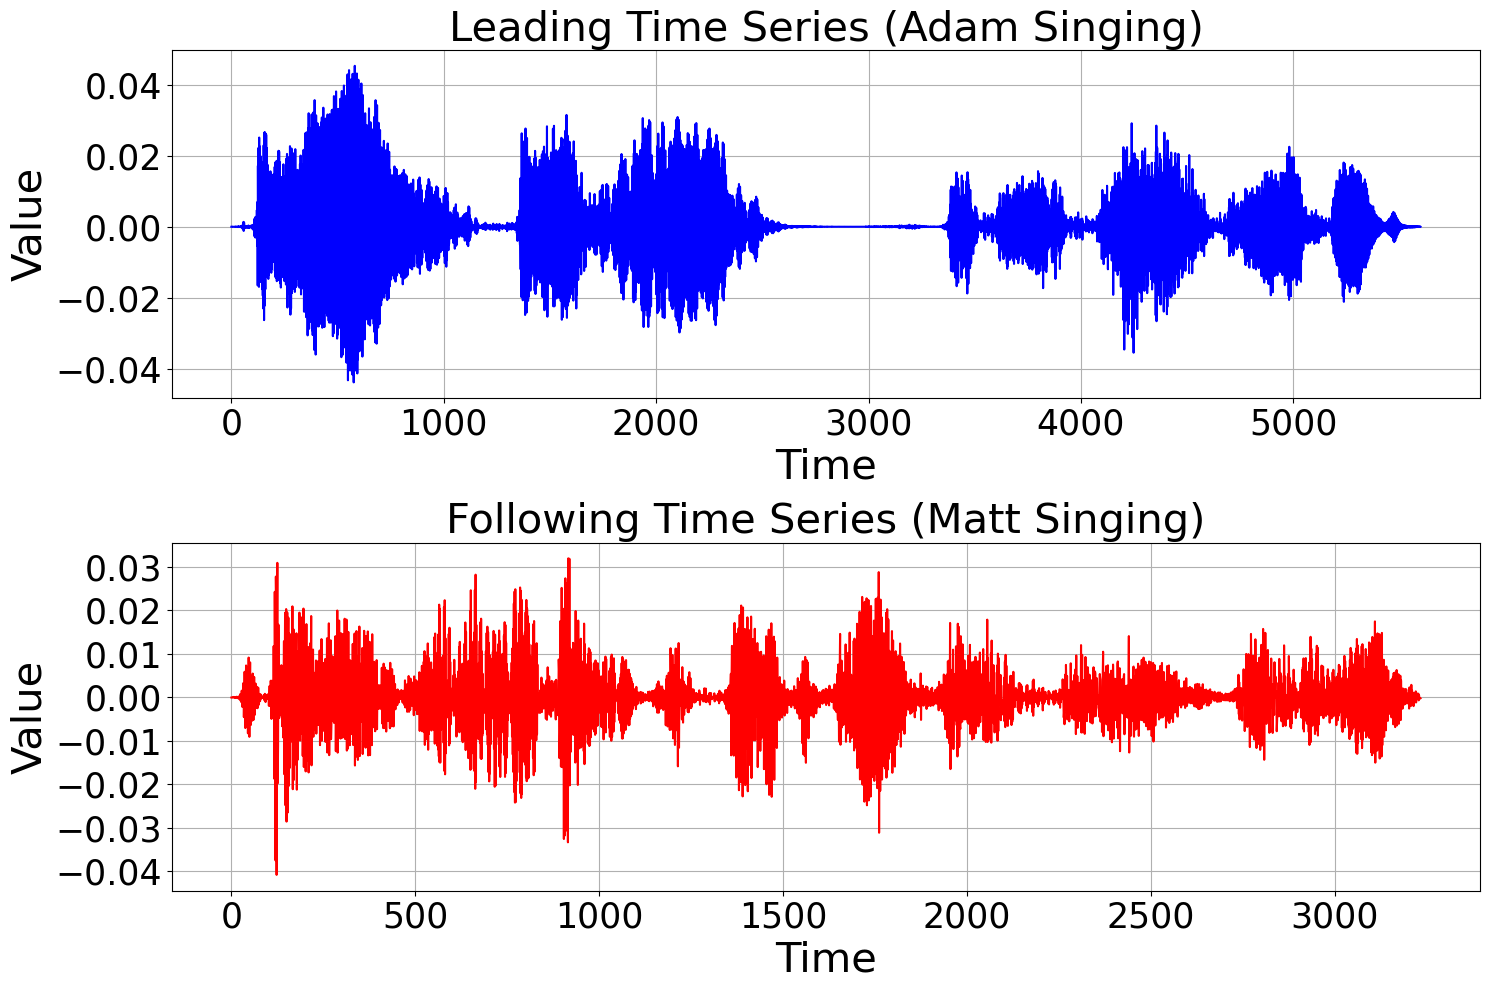

In [35]:
leadfollow_visualization(noised_sample_y_matt[6400:12000],
                         noised_sample_y_matt[15300:])

In [36]:
np.random.seed(0)

leading_signal = [noised_sample_y_adam,
                   [[0,12100],[5700,15100]]
                ]
following_signal = [noised_sample_y_matt,
                   [[6400,15300],[12000,len(noised_sample_y_matt)-1]]
                ]

true_false = evaluate_a_pair_ts(leading_signal,following_signal,seed=0,wd=700,gap=5)

data = [
    confusion_matrix(true_false[0],true_false[1],true_false[2],true_false[3])
]

# Create DataFrame
df = pd.DataFrame(data, columns=['TP', 'TN', 'FP', 'FN','Precision','Recall','F1','Accuracy'])
df.index = ["Dataset"]
df

0.19465521048741855


,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
Dataset,13459,7549,1177,1704,0.919582,0.887621,0.903319,0.879401


## AdamMatt (noise 0.000, 0.001 and 0.005)

In [37]:
for i in [0.000,0.001,0.005]:

  np.random.seed(0)

  noised_sample_y_adam   = sample_y_adam.copy()
  noised_sample_y_matt   = sample_y_matt.copy()

  noise_round = 1
  noise_size  = i

  for j in range(int(noise_round)):
    noised_sample_y_adam  += np.random.normal(0, noise_size, len(noised_sample_y_adam))
    noised_sample_y_matt  += np.random.normal(0, noise_size, len(noised_sample_y_matt))

  leading_signal   = noised_sample_y_adam.copy()
  following_signal = noised_sample_y_matt.copy()

  #================================================================================

  leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
  following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)]]
                  ]

  true_false = evaluate_a_pair_ts(leading_signal,following_signal,seed=0,wd=700,gap=10)

  data = [
      confusion_matrix(true_false[0],true_false[1],true_false[2],true_false[3])
  ]

  # Create DataFrame
  df = pd.DataFrame(data, columns=['TP', 'TN', 'FP', 'FN','Precision','Recall','F1','Accuracy'])
  df.index = [fr"{i}"]
  print(df)

0.168098986056419
        TP    TN    FP    FN  Precision    Recall        F1  Accuracy
0.0  11887  6750  1084  1897   0.916429  0.862377  0.888582  0.862106
0.21470378918864158
          TP    TN   FP    FN  Precision    Recall       F1  Accuracy
0.001  12703  7307  527  1549   0.960166  0.891313  0.92446  0.906004
0.23479251642375765
          TP    TN   FP    FN  Precision    Recall        F1  Accuracy
0.005  12718  7326  508  1448   0.961591  0.897783  0.928592  0.911091


In [38]:
for i in [0.000,0.001,0.005]:

  noised_sample_y_adam   = sample_y_adam.copy()
  noised_sample_y_matt   = sample_y_matt.copy()

  noise_round = 1
  noise_size  = i

  for j in range(int(noise_round)):
    noised_sample_y_adam  += np.random.normal(0, noise_size, len(noised_sample_y_adam))
    noised_sample_y_matt  += np.random.normal(0, noise_size, len(noised_sample_y_matt))

  leading_signal   = noised_sample_y_adam.copy()
  following_signal = noised_sample_y_matt.copy()

  #================================================================================

  np.random.seed(0)
  result = following_relation_method(leading_signal,following_signal,wd=700,gap=10)

  ts1 = create_timeseries_from_array(leading_signal)
  ts2 = create_timeseries_from_array(following_signal)

  fig, axs = plt.subplots(2, 1, figsize=(10, 10))

  leading_signal = [leading_signal,
                   [[0,12100],[5700,15100]]
                ]
  following_signal = [following_signal,
                    [[6400,15300],[12000,len(following_signal)-1]]
                  ]

  plot_time_series_with_highlights(ts1, result[2][1], axs[0],"Leading Singing by Adam",
                                   ground_truth_indices=ground_truth(leading_signal))
  plot_time_series_with_highlights(ts2, result[2][0], axs[1],"Following Singing by Matt",
                                   ground_truth_indices=ground_truth(following_signal))

  plt.tight_layout()
  plt.show()

KeyboardInterrupt: 

In [ ]:
len(noised_sample_y_matt)

18534

# Real Data 2 - CryptoCurrency

In [39]:
BTC_signal = np.load('leading_signal.npy')
ETH_signal = np.load('following_signal.npy')

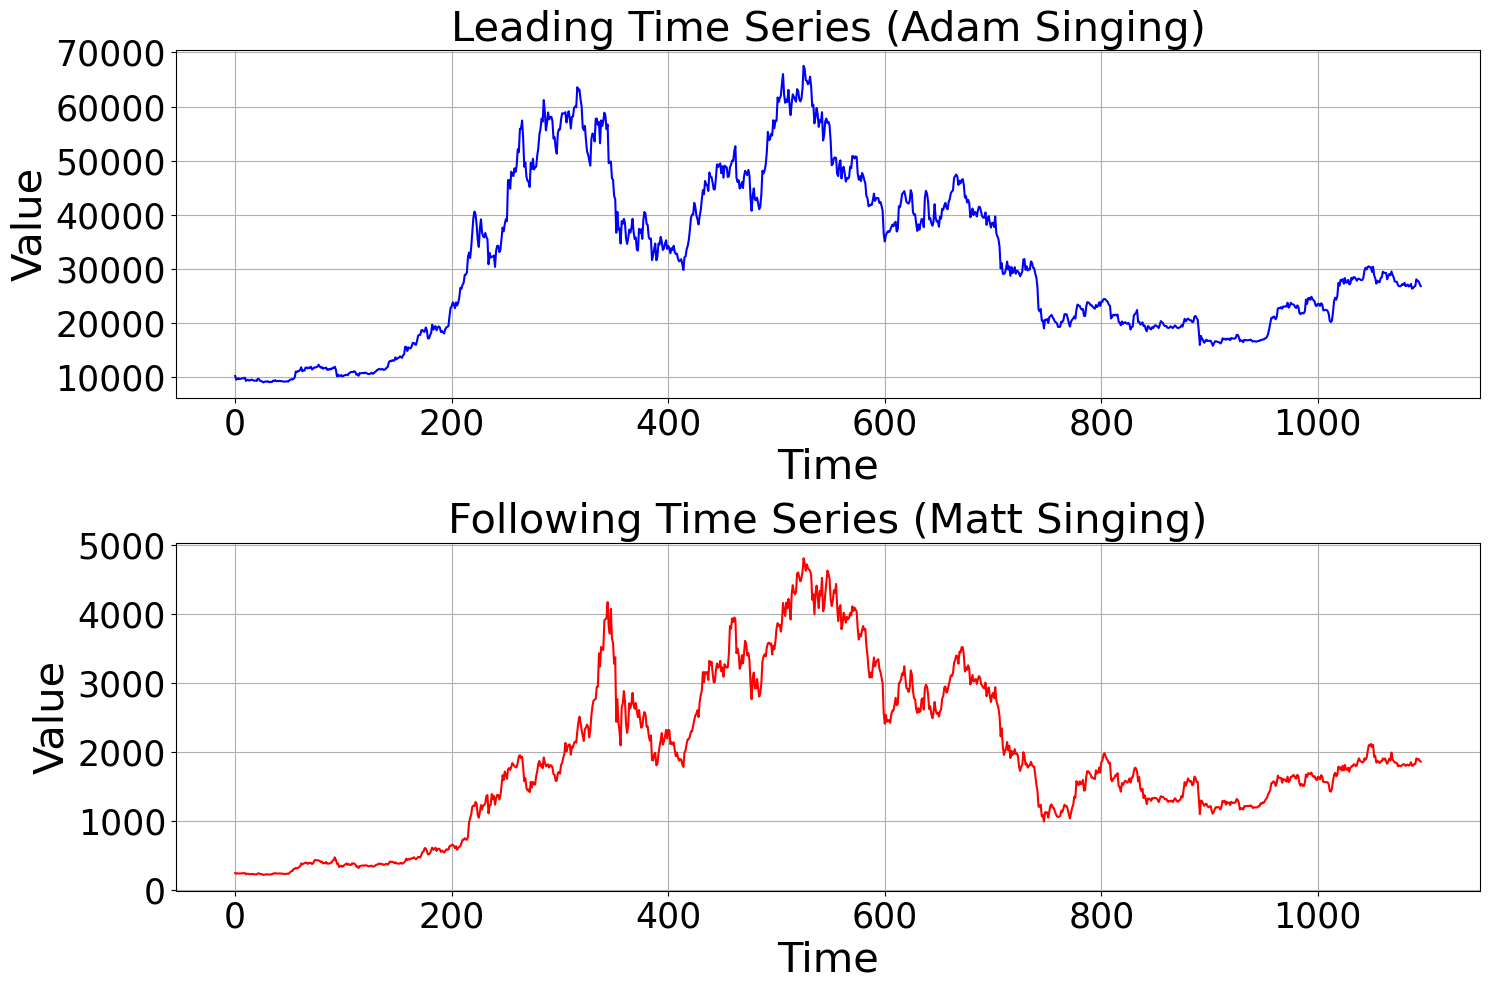

In [40]:
leadfollow_visualization(BTC_signal,ETH_signal)

In [41]:
def zNormalize(ts):
    ts -= np.mean(ts)
    std = np.std(ts)
    if std == 0:
        raise ValueError("The Standard Deviation cannot be zero")
    else:
        ts /= std
    return ts

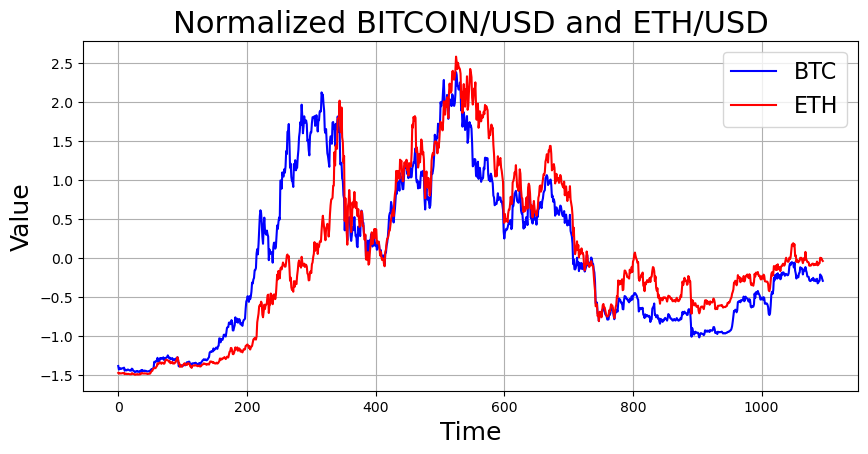

In [42]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('Normalized BITCOIN/USD and ETH/USD', fontsize=22)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.grid()
plt.plot(zNormalize(BTC_signal), label='BTC', color='blue')
plt.plot(zNormalize(ETH_signal), label='ETH', color='red')
plt.legend(fontsize=16)

plt.show()


In [ ]:
print(len(BTC_signal)/(24*2))
print(len(ETH_signal)/(24*2))

22.833333333333332
22.833333333333332


In [43]:
BTC_signal = np.load('leading_signal.npy')
ETH_signal = np.load('following_signal.npy')

In [ ]:
def plot_time_series_with_highlights(ts, highlight_indices, ax,
                                     title="Time Series with Highlighted Ranges", 
                                     ground_truth_indices=None):
    # Plot the time series data
    ax.plot(ts.index, ts.values, label='Time Series Data')

    # Highlight the predicted ranges
    if highlight_indices is not None:
        predicted_ranges = find_continuous_ranges(highlight_indices)
        for start_idx, end_idx in predicted_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                       color='yellow', alpha=0.7, label='Predicted')

    # Highlight the ground truth ranges
    if ground_truth_indices is not None:
        ground_truth_ranges = find_continuous_ranges(ground_truth_indices)
        for start_idx, end_idx in ground_truth_ranges:
            ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                       color='red', alpha=0.3, label='Ground Truth')
            
    # Highlight overlap areas
    if highlight_indices is not None and ground_truth_indices is not None:
        overlap_indices = set(highlight_indices).intersection(ground_truth_indices)
        if overlap_indices:
            overlap_ranges = find_continuous_ranges(sorted(list(overlap_indices)))
            for start_idx, end_idx in overlap_ranges:
                ax.axvspan(ts.index[start_idx], ts.index[end_idx],
                           color='yellow', alpha=0.5, label='Overlap')

    # Adding labels and title for clarity
    ax.set_xlabel('Time Step', fontsize=18)
    ax.set_ylabel('Value', fontsize=18)
    ax.set_title(title, fontsize=20)

    # Create a legend with unique entries
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), fontsize=16)
    

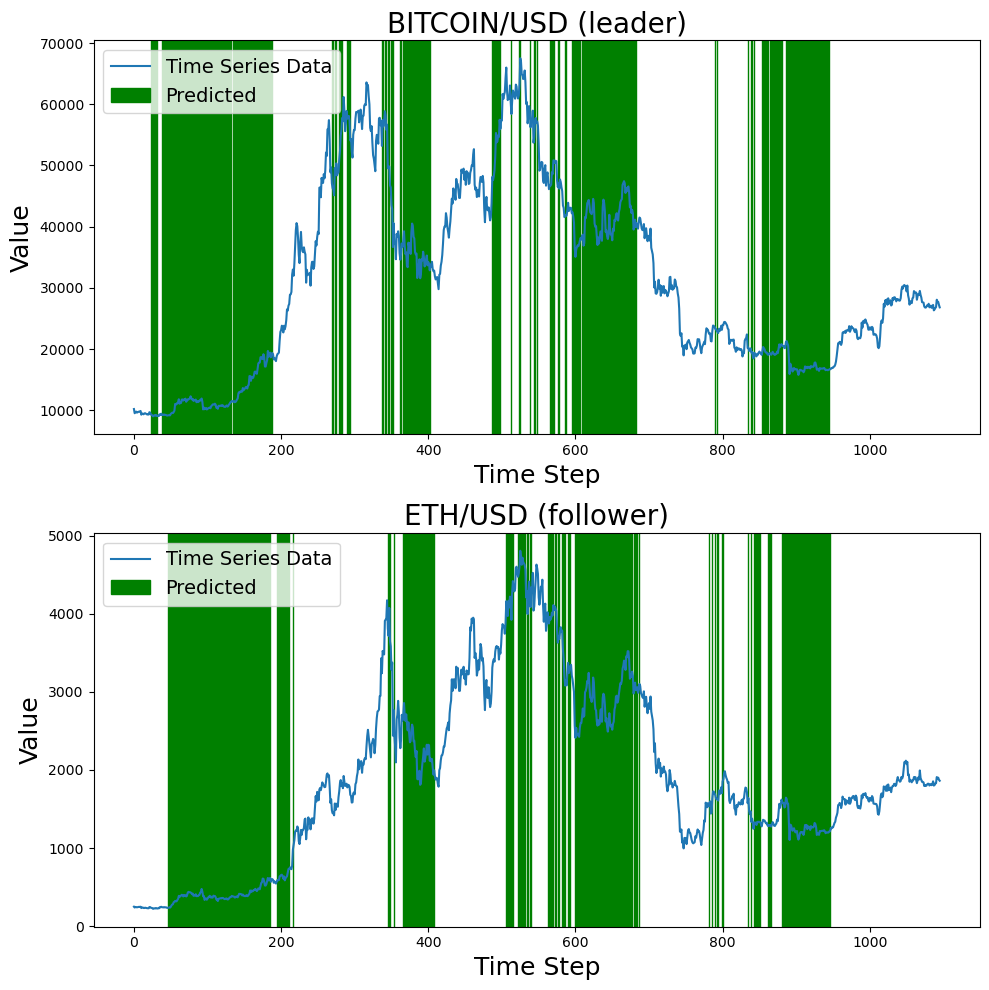

In [44]:
np.random.seed(0)
result = following_relation_method(BTC_signal,ETH_signal,wd=150,gap=5)

ts1 = create_timeseries_from_array(BTC_signal)
ts2 = create_timeseries_from_array(ETH_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

plot_time_series_with_highlights(ts1, result[2][1], axs[0],"BITCOIN/USD (leader)")
plot_time_series_with_highlights(ts2, result[2][0], axs[1],"ETH/USD (follower)")

plt.tight_layout()
plt.show()

In [45]:
result[0]

True

In [46]:
result[1]

0.019837787726004034

In [ ]:
np.random.seed(0)
result1 = following_relation_method(ETH_signal,BTC_signal,wd=150,gap=5)
result1[0]

False

In [ ]:
result1[1]

-37.720657276995304

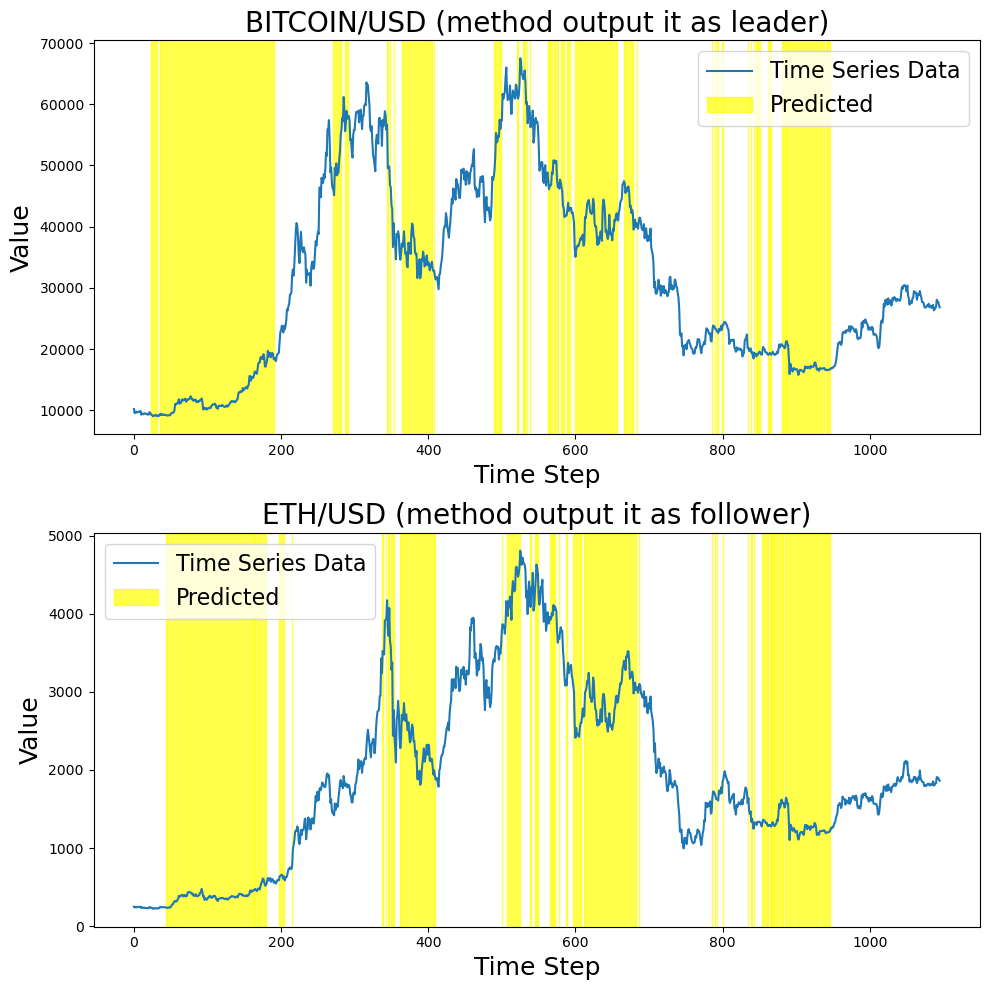

In [ ]:
ts1 = create_timeseries_from_array(ETH_signal)
ts2 = create_timeseries_from_array(BTC_signal)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

plot_time_series_with_highlights(ts2, result1[2][0], axs[0],"BITCOIN/USD (method output it as leader)")
plot_time_series_with_highlights(ts1, result1[2][1], axs[1],"ETH/USD (method output it as follower)")

plt.tight_layout()
plt.show()

In [ ]:
result1[2][1]==result[2][1]

False

In [ ]:
result1[2][0]==result[2][0]

False

In [ ]:
result[2][0]==result[2][0]

True

# Alignment Plot 

In [ ]:
noised_sample_y_adam   = sample_y_adam.copy()
noised_sample_y_matt   = sample_y_matt.copy()

noise_round = 1
noise_size  = 0.000

for j in range(int(noise_round)):
    noised_sample_y_adam  += np.random.normal(0, noise_size, len(noised_sample_y_adam))
    noised_sample_y_matt  += np.random.normal(0, noise_size, len(noised_sample_y_matt))

leading_signal   = noised_sample_y_adam.copy()
following_signal = noised_sample_y_matt.copy()

np.random.seed(0)
result_sound = following_relation_method(leading_signal,following_signal,wd=700,gap=10)

KeyboardInterrupt: 

Standard Length: 7134


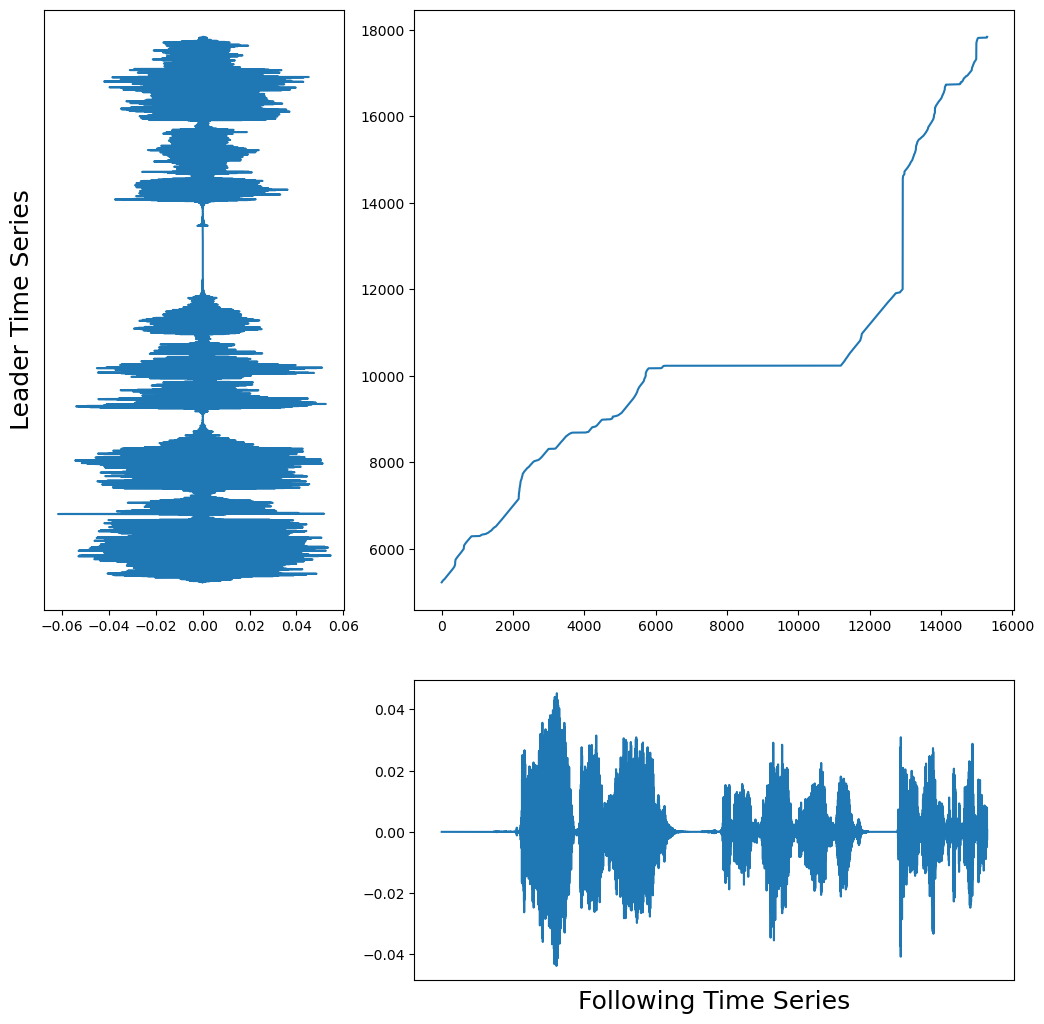

In [ ]:
alignment_plot(leading_signal,following_signal,result_sound)

Standard Length: 426


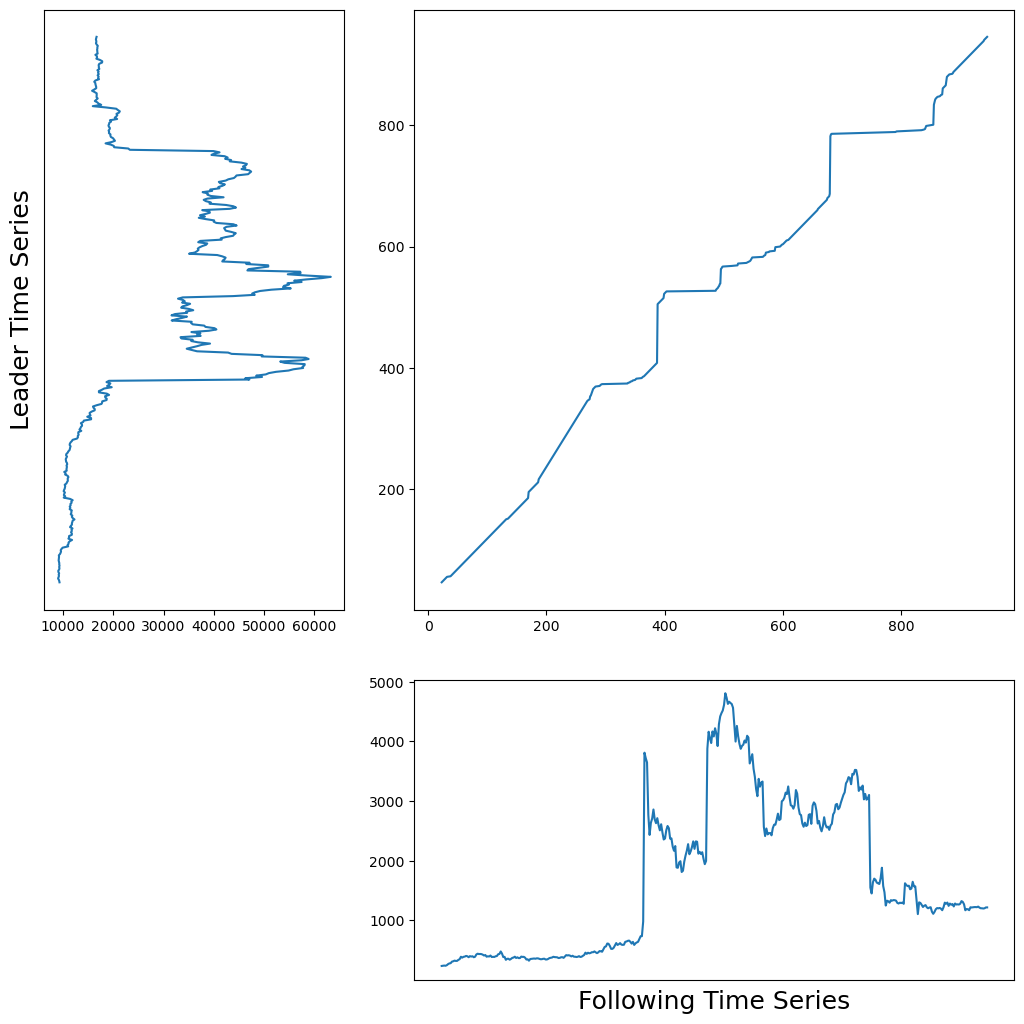

In [ ]:
alignment_plot(BTC_signal,ETH_signal,result)

In [ ]:
def leading_ts(randseed=0,k_motif=2,varied_len=False,one_motif=False):

  np.random.seed(randseed)

  #-------------------------------------------------------------------------------------------

  if varied_len:

    high = 1000
    N = np.random.randint(int(0.1*high),high=high)

    motif_start_list   = [0]
    discord_start_list = [0]

    while (motif_start_list[-1]<N) and (discord_start_list[-1]<N):
     
      # motif length
      motif_length   = np.random.randint(int(N*0.025),high=int(N*0.1))

      # discord length
      discord_length = int(motif_length*5)
      while (N%(discord_length+motif_length) != 0) and (discord_length>int(N*0.6)): discord_length += 1

      #new motif and discord start
      discord_start_list.append(motif_start_list[-1]+motif_length)
      motif_start_list.append(discord_start_list[-1]+discord_length)

    discord_start_list = discord_start_list[1:]
    if motif_start_list[-1] > N:
      motif_start_list = motif_start_list[:-1]
      if discord_start_list[-1] > N:
        discord_start_list = discord_start_list[:-1]

  else:
    N = 1000

    if one_motif:
      motif_length   = np.random.randint(int(N*0.1),high=int(N*0.15))
      discord_length = int(motif_length*5)
      motif_start_list   = [int(N*np.random.randint(int(15),high=int(30))/100)+motif_length]

    else:
      motif_length   = np.random.randint(int(N*0.025),high=int(N*0.1))
      discord_length = int(motif_length*1.2)
      motif_start_list   = [i for i in range(0,N,int(motif_length+discord_length))]

  t = np.arange(N)
  time_series = np.zeros(N)

  #-------------------------------------------------------------------------------------------

  n = 0
  i = 0
  motif = [[np.random.randint(low=2,high=20)/10,np.random.randint(low=300,high=500)/100] for i in range(k_motif)]
  #motif = [[np.random.randint(low=2,high=10)/10,np.random.randint(low=30,high=50)] for i in range(k_motif)]

  if motif_start_list[0] != 0:
    time_series[0:motif_start_list[0]] += (np.random.normal(0, 0.5,len(time_series[0:motif_start_list[0]])))

  while n<len(motif_start_list):
    factor = np.random.randint(low=1,high=7)
    if k_motif <= 1: i = 0
    try:
      time_series[motif_start_list[n]:motif_start_list[n]+motif_length] += np.sin(motif[i][0] * np.pi * t[:motif_length]/motif[i][1])
    except ValueError:
      time_series[motif_start_list[n]:N] += np.sin(motif[i][0] * np.pi * t[:int(N-motif_start_list[n])]/motif[i][1])
      break

    #if i%3==0: factor=5
    try:
      time_series[motif_start_list[n]+motif_length:motif_start_list[n+1]] += (np.random.normal(0, 0.5, discord_length))*factor
    except IndexError:
      time_series[motif_start_list[n]+motif_length:N] += (np.random.normal(0, 0.5, (N-motif_start_list[n]-motif_length)))*factor

    n += 1
    i += 1
    if i == len(motif): i = 0

  #-------------------------------------------------------------------------------------------

  time_series += (np.random.normal(0, 0.1, N))
  time_series += (np.random.normal(0, 0.1, N))

  #-------------------------------------------------------------------------------------------
  if not varied_len:
    motif_interval = [[x for x in motif_start_list],[x+motif_length for x in motif_start_list]]
    

    return (time_series, motif_interval)

  return time_series

In [ ]:
def following_ts(leading_ts,randseed=0,uncontinuous=True,ground_truth=False):

  np.random.seed(randseed)

  leading_signal = leading_ts[0].copy()
  N              = (leading_signal.shape)[0]
  percent        = np.random.randint(low=20,high=35)/100
  N_first_signal = int(np.ceil(N*percent))
  N_follow       = N - N_first_signal

  degree_of_noise = 3
  noise = 0.5

  first_signal = np.random.normal(0, noise, N_first_signal)*5

  #leader interval
  lead_motif_start = list(leading_ts[1][0])
  lead_motif_stop  = list(leading_ts[1][1])

  motif_start,motif_stop = [],[]

  #following time series generating
  if uncontinuous:

    time_series = np.zeros(N)
    cutting_point = int(len(time_series)/2)

    percent        = np.random.randint(low=10,high=15)/100
    second_N       = int(len(time_series)*percent)

    interrupt = True

    for t in range(N):
      lag = np.random.randint(0, min(t, degree_of_noise) + 1)
      time_series[t] = leading_signal[t - lag]

      if t in lead_motif_start:
        if t<cutting_point:
          motif_start.append(t+N_first_signal)
        else:
          motif_start.append(t+N_first_signal+second_N)

      if t in lead_motif_stop:
        if t<cutting_point:
          motif_stop.append(t+N_first_signal)
        elif (t in range(cutting_point,cutting_point+second_N+1)) and interrupt:
          motif_stop.append(cutting_point+N_first_signal)
          interrupt = False
        else:
          motif_stop.append(second_N+N_first_signal+t)

    time_series1 = time_series[:cutting_point]
    time_series2 = time_series[cutting_point:]

    percent        = np.random.randint(low=10,high=15)/100
    second_signal = np.random.normal(0, noise, second_N)*5

    time_series = np.hstack((first_signal,time_series1,second_signal,time_series2))[:N]

  else:
    time_series = np.zeros(N)
    for t in range(N):
      lag = np.random.randint(0, min(t, degree_of_noise) + 1)
      time_series[t] = leading_signal[t - lag]

      if t in lead_motif_start:
        motif_start.append(t+N_first_signal)
      if t in lead_motif_stop:
        motif_stop.append(t+N_first_signal)

    time_series = np.hstack((first_signal,time_series))[:N]

  # adding noise
  time_series += np.random.normal(0, 0.1, N)
  time_series += (np.random.normal(0, 0.1, N))

  #motif_interval
  motif_start = [x for x in motif_start if x<N]
  motif_stop = [x for x in motif_stop if x<N]

  motif_interval = [motif_start[:len(motif_stop)],motif_stop]
  #print(motif_interval)

  if ground_truth:
    motif_start = motif_start[:len(motif_stop)]

    keys   = list(range(len(motif_start)))
    values = []
    for i in range(len(motif_start)):
      pair_result = {
          "leader_interval" : [lead_motif_start[i],lead_motif_stop[i]],
          "follower_interval":[motif_start[i],motif_stop[i]]
      }
      values.append(pair_result)
    result = dict(zip(keys,values))

    return (time_series, result)

  return (time_series, motif_interval)

In [ ]:
leader_list_2   = [leading_ts(randseed=i,k_motif=10,varied_len=False)            for i in range(1000)]
follower_list_2 = [following_ts(leader_list_2[i],randseed= i,uncontinuous=False) for i in range(1000)]

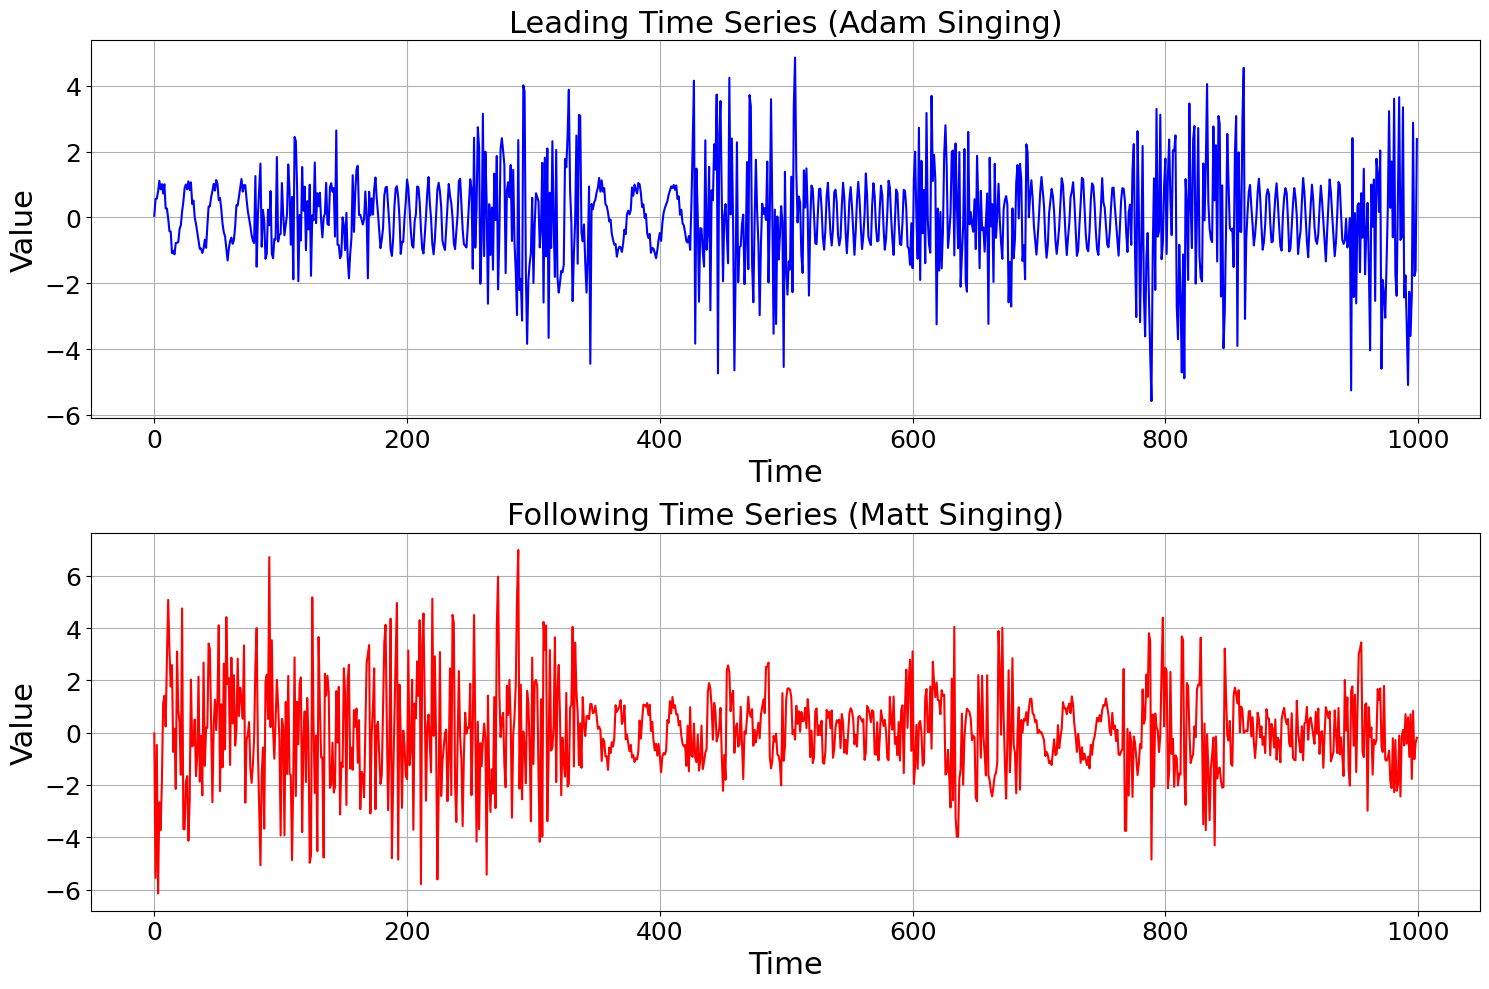

In [ ]:
leadfollow_visualization(leader_list_2[9][0],follower_list_2[9][0])

In [ ]:
"""
for i in range(850,900):
    print(fr"random seed: {i}")
    np.random.seed(i)

    leading_signal   = (leader_list_2[i][0]).copy()
    following_signal = (follower_list_2[i][0]).copy()

    result = following_relation_method(leading_signal,following_signal,wd=50,gap=10)

    leadfollow_visualization(leading_signal[result[2][1]],
                            following_signal[result[2][0]])
    
    print("==================================")
"""

'\nfor i in range(850,900):\n    print(fr"random seed: {i}")\n    np.random.seed(i)\n\n    leading_signal   = (leader_list_2[i][0]).copy()\n    following_signal = (follower_list_2[i][0]).copy()\n\n    result = following_relation_method(leading_signal,following_signal,wd=50,gap=10)\n\n    leadfollow_visualization(leading_signal[result[2][1]],\n                            following_signal[result[2][0]])\n    \n    print("==================================")\n'

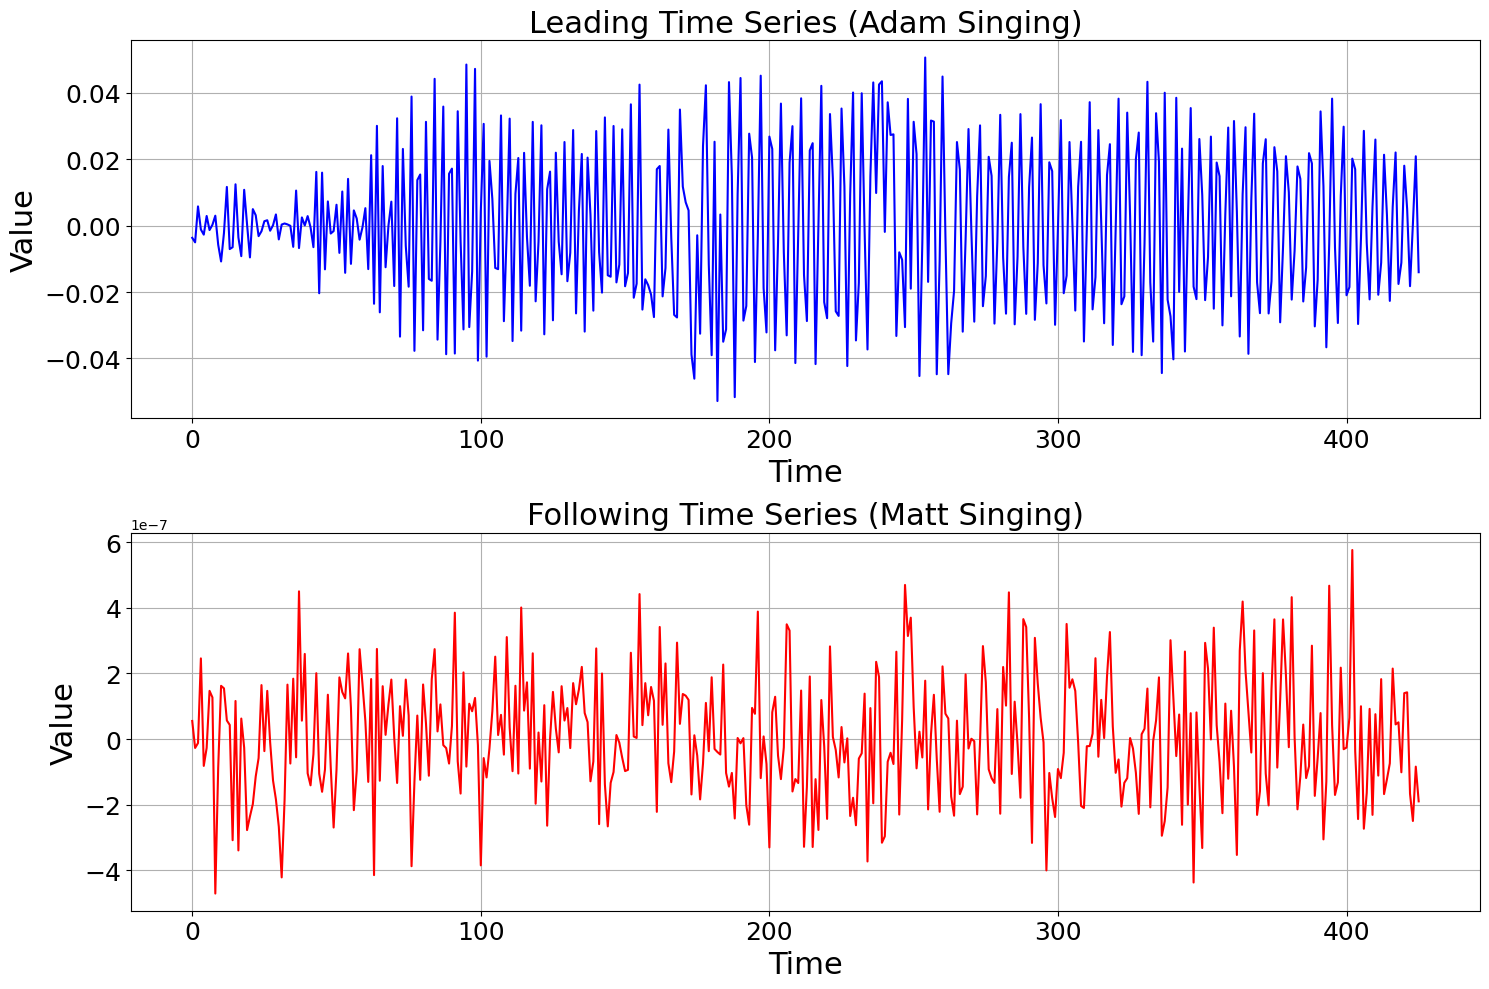

In [ ]:
leadfollow_visualization(leading_signal[result[2][1]],
                         following_signal[result[2][0]])

random seed: 883


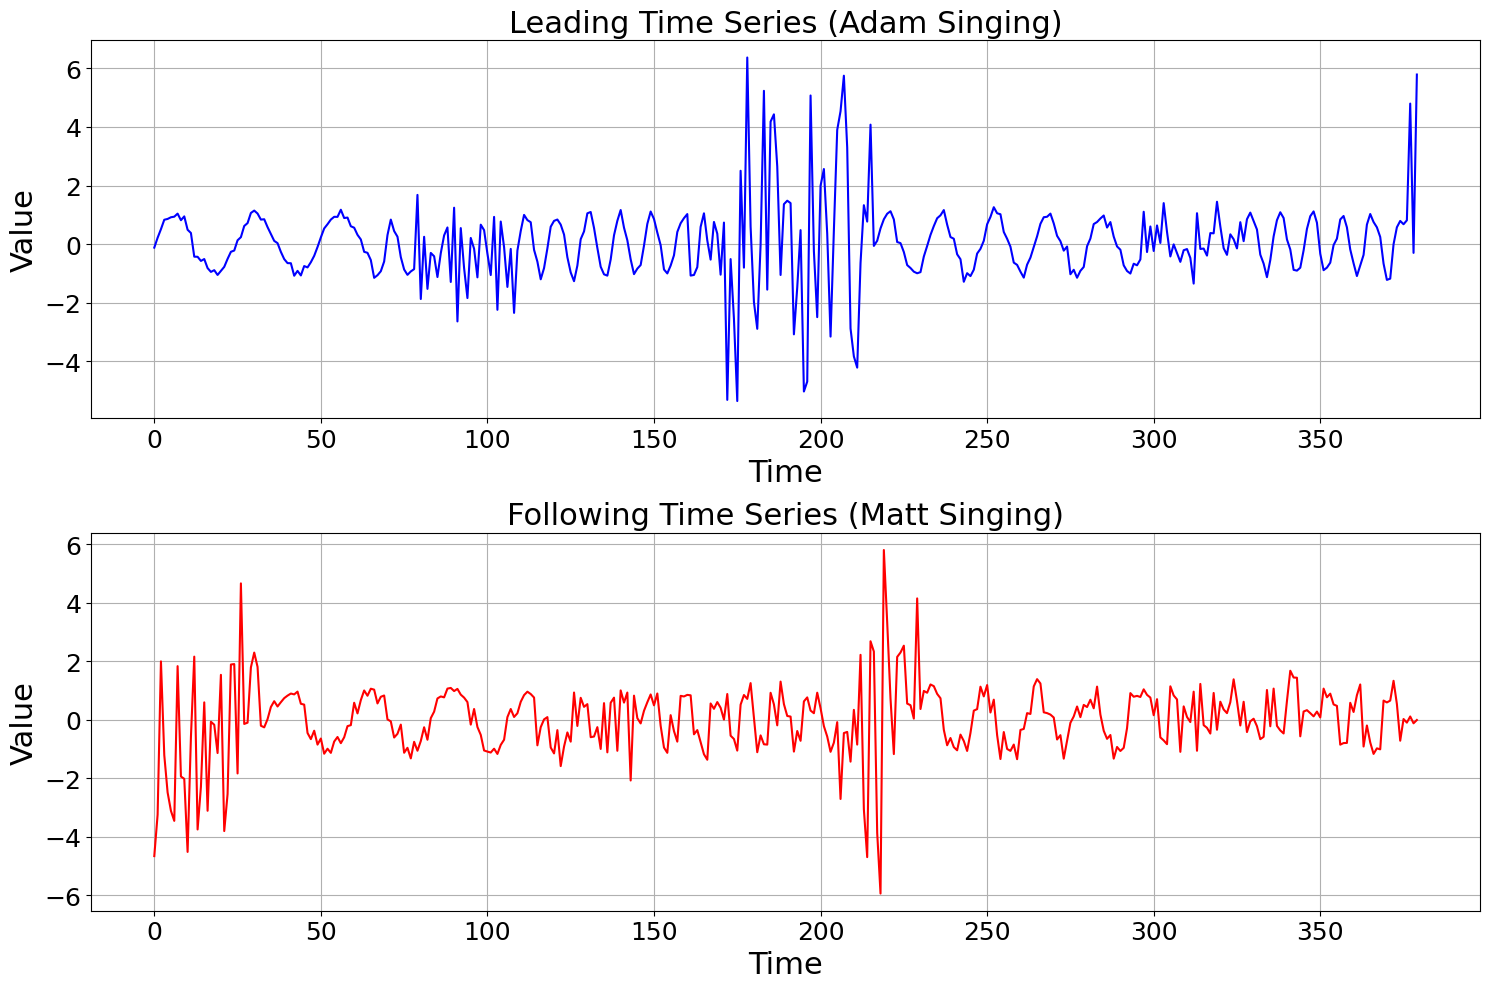

In [ ]:
for i in [883]:
    print(fr"random seed: {i}")
    np.random.seed(i)

    leading_signal   = (leader_list_2[i][0]).copy()
    following_signal = (follower_list_2[i][0]).copy()

    result = following_relation_method(leading_signal,following_signal,wd=50,gap=10)

    leadfollow_visualization(leading_signal[result[2][1]],
                            following_signal[result[2][0]])
    
    print("==================================")

In [ ]:
leading_signal   = (leader_list_2[i][0]).copy()
following_signal = (follower_list_2[i][0]).copy()

leadfollow_visualization(leading_signal[result[2][1]],following_signal[result[2][0]])
    

Standard Length: 380


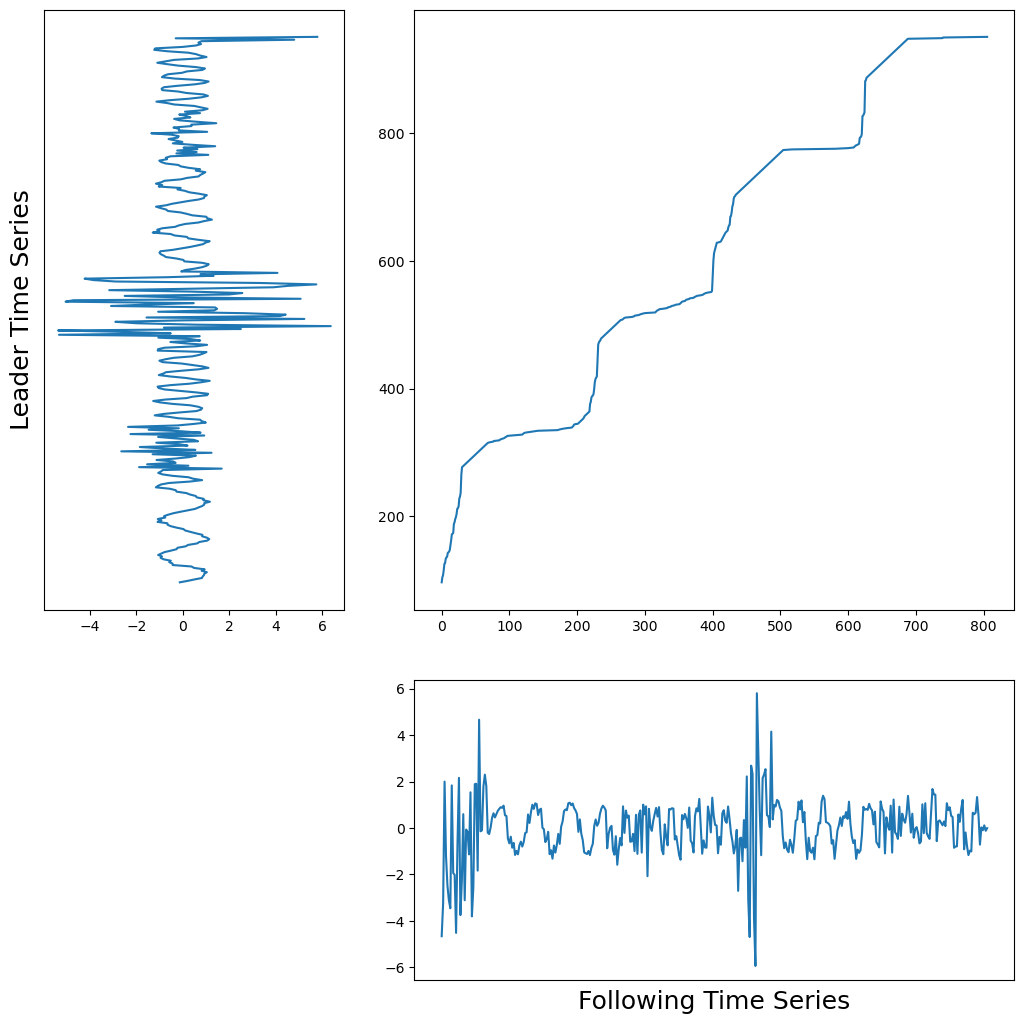

In [ ]:
alignment_plot(leading_signal,following_signal,result)

804, 883

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<AxesSubplot:xlabel='Index', ylabel='Query value'>

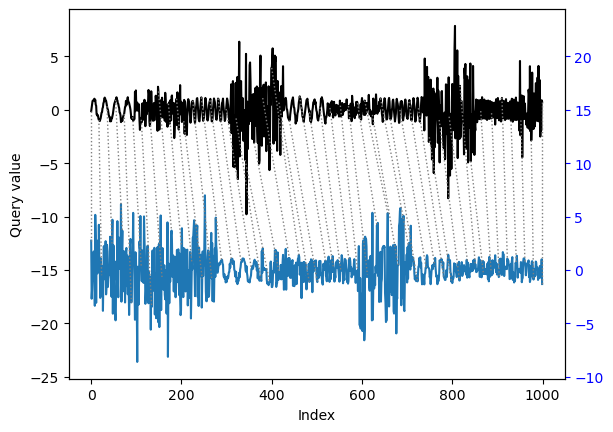

In [ ]:
from dtw import *

alignment = dtw(leading_signal,
    following_signal,
    keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))

alignment.plot(type="twoway",offset=-15)